In [1]:
import os
import numpy as np
from customdatagen import imgLoader
#import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import glob
import random



(128, 128, 128, 4)


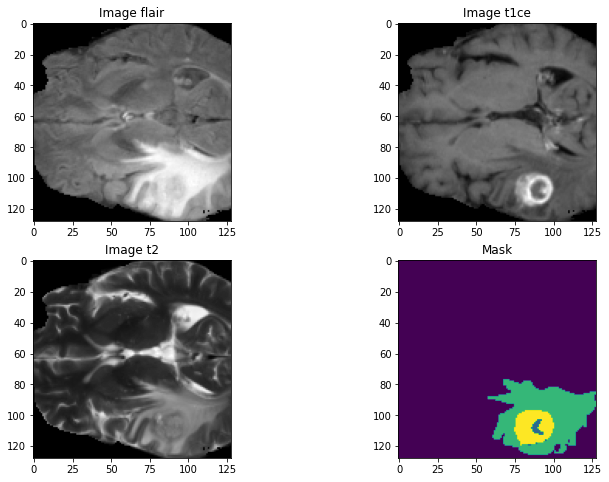

In [ ]:
train_img_dir = "/content/drive/MyDrive/Work/Dataset/Split/train/img/"
train_mask_dir = "/content/drive/MyDrive/Work/Dataset/Split/train/mask/"

img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

num_images = len(os.listdir(train_img_dir))

img_num = random.randint(0,num_images-1)
test_img = np.load(train_img_dir+img_list[img_num])
test_mask = np.load(train_mask_dir+msk_list[img_num])
print(test_mask.shape)
test_mask = np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:
print(test_img.shape)

(128, 128, 128, 3)


In [ ]:
print(test_mask.shape)

(128, 128, 128)


In [ ]:
import pandas as pd

In [ ]:
columns = ['0','1', '2', '3']
df = pd.DataFrame(columns=columns)
train_mask_list = sorted(glob.glob('/content/drive/MyDrive/Work/Dataset/Split/train/mask/*.npy'))
print(train_mask_list)
for img in range(len(train_mask_list)):
    # print(img)
    temp_image=np.load(train_mask_list[img])
    temp_image = np.argmax(temp_image, axis=3)
    val, counts = np.unique(temp_image, return_counts=True)
    zipped = zip(columns, counts)
    conts_dict = dict(zipped)
    
    df = df.append(conts_dict, ignore_index=True)

label_0 = df['0'].sum()
label_1 = df['1'].sum()
label_2 = df['1'].sum()
label_3 = df['3'].sum()
total_labels = label_0 + label_1 + label_2 + label_3
n_classes = 4
#Class weights claculation: n_samples / (n_classes * n_samples_for_class)
wt0 = round((total_labels/(n_classes*label_0)), 2) #round to 2 decimals
wt1 = round((total_labels/(n_classes*label_1)), 2)
wt2 = round((total_labels/(n_classes*label_2)), 2)
wt3 = round((total_labels/(n_classes*label_3)), 2)

['/content/drive/MyDrive/Work/Dataset/Split/train/mask/mask0.npy', '/content/drive/MyDrive/Work/Dataset/Split/train/mask/mask1.npy', '/content/drive/MyDrive/Work/Dataset/Split/train/mask/mask10.npy', '/content/drive/MyDrive/Work/Dataset/Split/train/mask/mask101.npy', '/content/drive/MyDrive/Work/Dataset/Split/train/mask/mask102.npy', '/content/drive/MyDrive/Work/Dataset/Split/train/mask/mask103.npy', '/content/drive/MyDrive/Work/Dataset/Split/train/mask/mask104.npy', '/content/drive/MyDrive/Work/Dataset/Split/train/mask/mask105.npy', '/content/drive/MyDrive/Work/Dataset/Split/train/mask/mask106.npy', '/content/drive/MyDrive/Work/Dataset/Split/train/mask/mask108.npy', '/content/drive/MyDrive/Work/Dataset/Split/train/mask/mask11.npy', '/content/drive/MyDrive/Work/Dataset/Split/train/mask/mask112.npy', '/content/drive/MyDrive/Work/Dataset/Split/train/mask/mask115.npy', '/content/drive/MyDrive/Work/Dataset/Split/train/mask/mask116.npy', '/content/drive/MyDrive/Work/Dataset/Split/train/mask

In [ ]:
print(label_0,label_1,label_2,label_3)

582982471.0 6498498.0 6498498.0 5750988


In [ ]:
print(wt0,wt1,wt2,wt3)

0.26 23.15 23.15 26.16


In [ ]:
print(df.head())

         0      1       2      3
0  1886119  15443  167848  27742
1  2030146   9160   51297   6549
2  2044186   4603   42589   5774
3  2073009   7362    9348   7433
4  2058415  10292    5953  22492


In [6]:
wt0, wt1, wt2, wt3 = 0.26,0.23,0.23,0.26

In [ ]:
l=sorted(train_mask_list)
for i in l:
  print(i)

In [ ]:
train_img_list=sorted(glob.glob('/content/drive/MyDrive/Work/Dataset/Split/train/img/*.npy'))
train_mask_list=sorted(glob.glob('/content/drive/MyDrive/Work/Dataset/Split/train/mask/*.npy'))

val_img_list=sorted(glob.glob('/content/drive/MyDrive/Work/Dataset/Split/val/img/*.npy'))
val_mask_list=sorted(glob.glob('/content/drive/MyDrive/Work/Dataset/Split/val/mask/*.npy'))

In [ ]:
batch_size = 2

In [ ]:
train_img_datagen = imgLoader(train_img_list, 
                              train_mask_list, batch_size)

val_img_datagen = imgLoader(val_img_list, 
                            val_mask_list, batch_size)

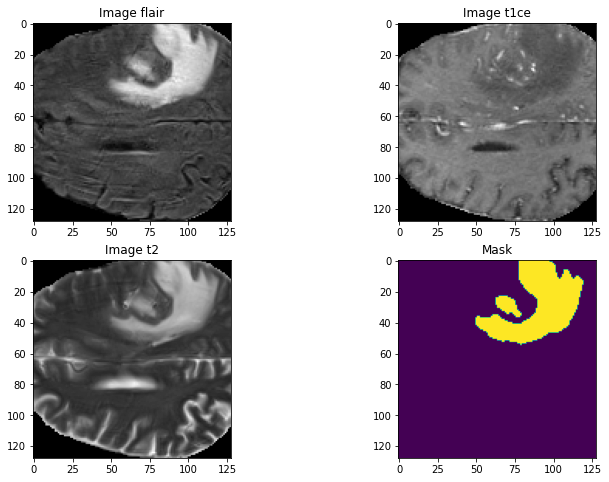

In [ ]:
img, msk = train_img_datagen.__next__()

img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

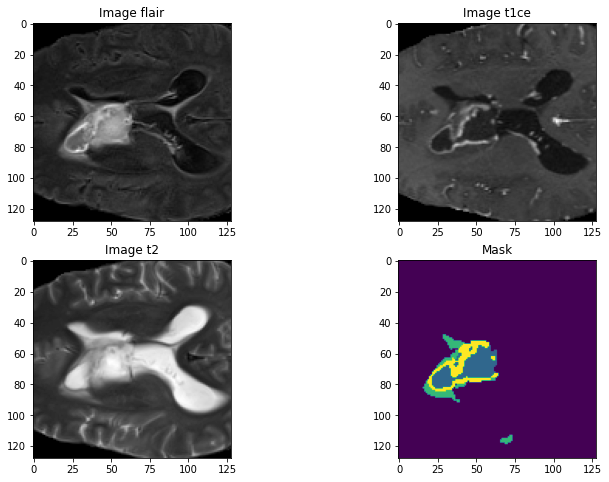

In [ ]:
img, msk = val_img_datagen.__next__()

img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [3]:
!pip install segmentation-models-3D

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.9/62.9 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 7.3 MB/s eta 0:00:00


In [4]:
import segmentation_models_3D as sm

Segmentation Models: using `tf.keras` framework.


In [7]:
dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3])) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

LR = 0.0001
optim = keras.optimizers.Adam(LR)

In [ ]:
steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size

In [ ]:
from  seg_model2 import simple_unet_model

In [ ]:
model = simple_unet_model(IMG_HEIGHT=128, 
                          IMG_WIDTH=128, 
                          IMG_DEPTH=128, 
                          IMG_CHANNELS=3, 
                          num_classes=4)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d_19 (Conv3D)             (None, 128, 128, 12  1312        ['input_2[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout_9 (Dropout)            (None, 128, 128, 12  0           ['conv3d_19[0][0]']              
                                8, 16)                                                      

In [ ]:
model.compile(optimizer = optim, loss=total_loss, metrics=metrics)
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d_19 (Conv3D)             (None, 128, 128, 12  1312        ['input_2[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout_9 (Dropout)            (None, 128, 128, 12  0           ['conv3d_19[0][0]']              
                                8, 16)                                                      

In [ ]:
print(model.input_shape)
print(model.output_shape)

(None, 128, 128, 128, 3)
(None, 128, 128, 128, 4)


In [ ]:
train_img_datagen=imgLoader(train_img_list,train_mask_list,batch_size)
train_img_datagen=imgLoader(val_img_list,val_mask_list,batch_size)

In [ ]:
history=model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=20,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )

Epoch 1/20
146/146 [==============================] - 436s 3s/step - loss: 0.9506 - accuracy: 0.8856 - iou_score: 0.2083 - val_loss: 0.9310 - val_accuracy: 0.9533 - val_iou_score: 0.2368
Epoch 2/20
146/146 [==============================] - 283s 2s/step - loss: 0.9211 - accuracy: 0.9459 - iou_score: 0.2572 - val_loss: 0.9145 - val_accuracy: 0.9462 - val_iou_score: 0.2795
Epoch 3/20
146/146 [==============================] - 314s 2s/step - loss: 0.9093 - accuracy: 0.9487 - iou_score: 0.3161 - val_loss: 0.9036 - val_accuracy: 0.9436 - val_iou_score: 0.3447
Epoch 4/20
146/146 [==============================] - 304s 2s/step - loss: 0.8966 - accuracy: 0.9534 - iou_score: 0.3552 - val_loss: 0.9164 - val_accuracy: 0.8662 - val_iou_score: 0.3491
Epoch 5/20
146/146 [==============================] - 307s 2s/step - loss: 0.8878 - accuracy: 0.9456 - iou_score: 0.4186 - val_loss: 0.8657 - val_accuracy: 0.9682 - val_iou_score: 0.4960
Epoch 6/20
146/146 [==============================] - 309s 2s/ste

In [ ]:
model.save('/content/drive/MyDrive/Work/Segmentation_Model2.hdf5')

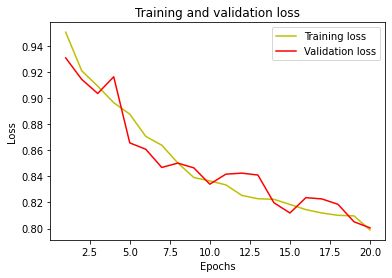

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

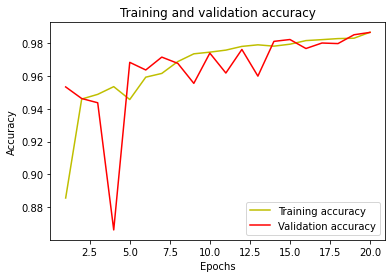

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc,'y',label='Training accuracy')
plt.plot(epochs, val_acc,'r',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [2]:
from keras.models import load_model

In [8]:
# my_model=load_model('/content/drive/MyDrive/Work/Segmentation_Model.hdf5')
my_model = load_model('/content/drive/MyDrive/Work/Segmentation_Model2.hdf5', 
                      custom_objects={'dice_loss_plus_1focal_loss': total_loss,
                                      'iou_score':sm.metrics.IOUScore(threshold=0.5)},compile=False)

In [9]:
from keras.metrics import MeanIoU

In [ ]:
batch_size=8

In [ ]:
test_img_datagen = imgLoader(val_img_list, 
                                val_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
test_image_batch, test_mask_batch = test_img_datagen.__next__()

test_mask_batch_argmax = np.argmax(test_mask_batch, axis=4)
test_pred_batch = my_model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=4)

n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

1/1 [==============================] - 9s 9s/step
Mean IoU = 0.7699833


In [14]:
img_num = 137

test_img = np.load("/content/drive/MyDrive/Work/Dataset/Split/val/img/image"+str(img_num)+".npy")

test_mask = np.load("/content/drive/MyDrive/Work/Dataset/Split/val/mask/mask"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]

1/1 [==============================] - 10s 10s/step


In [11]:
from matplotlib import pyplot as plt
import random

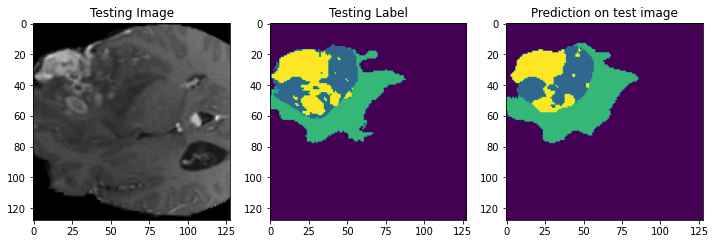

In [15]:
n_slice = 55
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()

In [16]:
val,counts=np.unique(test_prediction_argmax,return_counts=True)
print(val)
print(counts)

[0 1 2 3]
[1889056   27301  143262   37533]


In [18]:
total=counts.sum()
print(total)
for i in range(4):
  print(counts[i])

2097152
1889056
27301
143262
37533


In [25]:
### Function to define tumourous cell using the label counts.
def cancer_predicter(test_prediction_argmax,val1=0.02,val2=0.05):
  val,counts=np.unique(test_prediction_argmax,return_counts=True)
  total=counts.sum()
  tumor=counts[1]/total
  cancer=(counts[2]+counts[3])/total
  # print(cancer,tumor)
  if cancer>val1:
    print("Cancerous")
  elif cancer<val1 and tumor>val2:
    print("Tumor")
  elif cancer<val1 and tumor<val2:
    print("Healthy")
  

In [24]:
cancer_predicter(test_prediction_argmax)

0.08620977401733398 0.013018131256103516
Cancerous


**Home Work is to find the right threshold percentage.**